# Classification with Scikit Learn Long

Classification is a supervised learning technique useful when we want to predict discrete variables (like binary outcomes or belonging to a specific class).

- Pandas Documentation: http://pandas.pydata.org/
- Scikit Learn Documentation: http://scikit-learn.org/stable/documentation.html
- Seaborn Documentation: http://seaborn.pydata.org/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Classification with 1 feature and a binary target

In [2]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [3]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


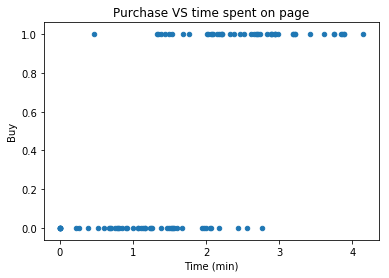

In [4]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Purchase VS time spent on page');

### Features

Let's ignore train/test split for now, we have few data

In [5]:
X = df[['Time (min)']].values
y = df['Buy'].values

### Linear Regression fail

Let's try to fit this with a linear regression first, it won't give correct results

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Visual comparison of predictions

In [8]:
y_pred = model.predict(X)

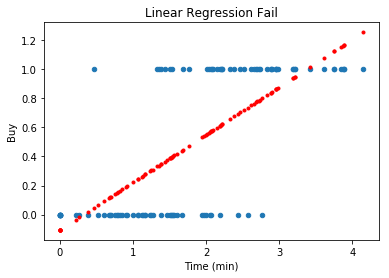

In [9]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Linear Regression Fail')
plt.plot(X, y_pred, '.r');

### Exercise: Logistic Regression

1. Replace the above model with a `LogisticRegression` and repeat the process. What results do you get?
2. Use the method `model.predict_proba` to also predict the probability of a predicted class

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

/home/milan/anaconda3/envs/ztdlbootcamp/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = model.predict(X)

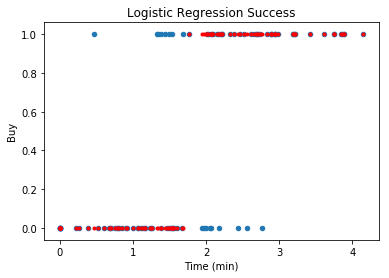

In [16]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Logistic Regression Success')
plt.plot(X, y_pred, '.r');

In [17]:
y_pred_prob = model.predict_proba(X)

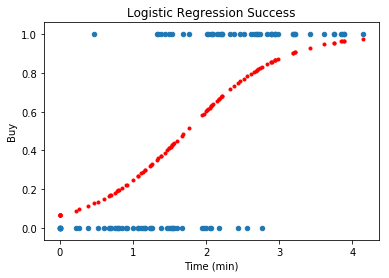

In [18]:
df.plot(kind='scatter', x='Time (min)', y='Buy',
        title='Logistic Regression Success')
plt.plot(X, y_pred_prob[:, 1], '.r');

## Classification with 2 features and a binary target

In [19]:
df = pd.read_csv('../data/isp_data.csv')

In [20]:
df.head()

,download,upload,label
0,2.373546,5.398106,0
1,3.183643,4.387974,0
2,2.164371,5.341120,0
3,4.595281,3.870637,0
4,3.329508,6.433024,0


In [21]:
df.label.unique()

array([0, 1])

In [22]:
import seaborn as sns

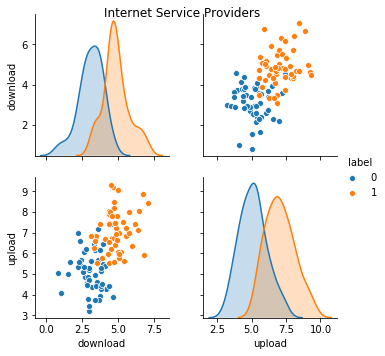

In [23]:
grid = sns.pairplot(df, hue='label', vars=['download', 'upload'])
grid.fig.suptitle('Internet Service Providers');

In [24]:
X = df[['download', 'upload']].values
y = df['label'].values

### Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state=0)

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

/home/milan/anaconda3/envs/ztdlbootcamp/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Performance evaluation

In [29]:
model.score(X_train, y_train)

0.8208955223880597

In [30]:
model.score(X_test, y_test)

0.8484848484848485

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
y_pred = model.predict(X_test)

In [33]:
print(confusion_matrix(y_test, y_pred))

[[13  2]
 [ 3 15]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.88      0.83      0.86        18

    accuracy                           0.85        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.85      0.85      0.85        33



## Classification with more features and more targets

In [35]:
df = pd.read_csv('../data/car.csv', dtype='category')

In [36]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null category
maint       1728 non-null category
doors       1728 non-null category
persons     1728 non-null category
lug_boot    1728 non-null category
safety      1728 non-null category
class       1728 non-null category
dtypes: category(7)
memory usage: 12.8 KB


### 1-hot encoding of features

In [38]:
features = df.drop('class', axis=1)

In [39]:
X = pd.get_dummies(features)

In [40]:
X.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


### Label encoding

In [41]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder 

In [43]:
le = LabelEncoder()
y = le.fit_transform(df['class'])
le.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

### Train test split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Fit a Decision Tree model

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
model = DecisionTreeClassifier()

In [47]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
y_pred = model.predict(X_test)

In [49]:
model.score(X_train, y_train)

1.0

In [50]:
model.score(X_test, y_test)

0.9682080924855492

# Exercises

### Exercise 1: 

- Benchmark your prediction. as you may have noticed, the labels are highly imbalanced, with most of the data falling in the `{"unacc": 2}` category. What score would you have gotten if you had predicted 2 for all of your test data? 
- Print a confusion matrix of the test predictions. Which classes get confused?
- Repeat the classification with the Logistic Regression model, does it improve the accuracy?

### Exercise 2

- load the churn dataset `../data/churn.csv`
- assign the `Churn` column to a variable called `y`
- assign the other columns to a variable called `features`
- separate numerical columns with `features.select_dtypes`
- split data into train/test with test_size=0.3 and random_state=42
- classify the resulting data using Decision Tree classifier
- try to improve the score changing any of the default initialization parameters of the classifier:
    - max_depth
    - min_samples_split
    - min_samples_leaf
    - max_features
- try to improve the score using a `LogisticRegression`
- try to improve the score using any other of the classifiers used [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
